## One Hot encoding using OneHOTEncoder

## One-hot encoding is a method to convert categorical data (like "HR", "IT", "Finance") into a numerical format that machine learning models can understand.

In [2]:
#one hot encoding OneHotEncoder of Scikit-Learn

import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [4]:
import pandas as pd

# Expanded employee dataset
data = {
    'Employee ID': [10, 20, 15, 25, 30, 35, 40, 45, 50, 55],
    'Name': ['Alice', 'Bob', 'Cathy', 'David', 'Eva', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack'],
    'Gender': ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
    'Age': [28, 34, 25, 45, 30, 38, 27, 41, 29, 36],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR', 'Finance', 'Marketing', 'IT', 'HR', 'Marketing'],
    'Salary': [50000, 70000, 52000, 80000, 56000, 78000, 60000, 85000, 58000, 62000],
    'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice', 'Excellent', 'Good', 'Outstanding', 'Nice', 'Great']
}

# Create DataFrame
df = pd.DataFrame(data)

# Print the expanded DataFrame
print(f'Expanded Employee Data:\n{df}')


Expanded Employee Data:
   Employee ID   Name Gender  Age Department  Salary      Remarks
0           10  Alice      F   28         HR   50000         Good
1           20    Bob      M   34         IT   70000         Nice
2           15  Cathy      F   25    Finance   52000         Good
3           25  David      M   45         IT   80000        Great
4           30    Eva      F   30         HR   56000         Nice
5           35  Frank      M   38    Finance   78000    Excellent
6           40  Grace      F   27  Marketing   60000         Good
7           45  Henry      M   41         IT   85000  Outstanding
8           50    Ivy      F   29         HR   58000         Nice
9           55   Jack      M   36  Marketing   62000        Great


In [5]:
# Extract categorical colums ffrom the dataframe
# Here we extract the columns with object datatype as they are the categorical ccolums
categorical_columns = df.select_dtypes(include= ['object']).columns.tolist()
categorical_columns

['Name', 'Gender', 'Department', 'Remarks']

In [9]:
#Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Aplly one-hot encoding ro rhe careforial colums
one_hot_encoded = encoder.fit_transform(df[categorical_columns])


#Create a DataFrame with the one-hot encoded columns
# We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns= encoder.get_feature_names_out(categorical_columns))


#Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df,one_hot_df], axis=1)


#Display the resulting dataframe
print(f'Encoded Employee data: \n{df_encoded}')


Encoded Employee data: 
   Employee ID   Name Gender  Age Department  Salary      Remarks  Name_Alice  \
0           10  Alice      F   28         HR   50000         Good         1.0   
1           20    Bob      M   34         IT   70000         Nice         0.0   
2           15  Cathy      F   25    Finance   52000         Good         0.0   
3           25  David      M   45         IT   80000        Great         0.0   
4           30    Eva      F   30         HR   56000         Nice         0.0   
5           35  Frank      M   38    Finance   78000    Excellent         0.0   
6           40  Grace      F   27  Marketing   60000         Good         0.0   
7           45  Henry      M   41         IT   85000  Outstanding         0.0   
8           50    Ivy      F   29         HR   58000         Nice         0.0   
9           55   Jack      M   36  Marketing   62000        Great         0.0   

   Name_Bob  Name_Cathy  ...  Gender_M  Department_Finance  Department_HR  \
0      

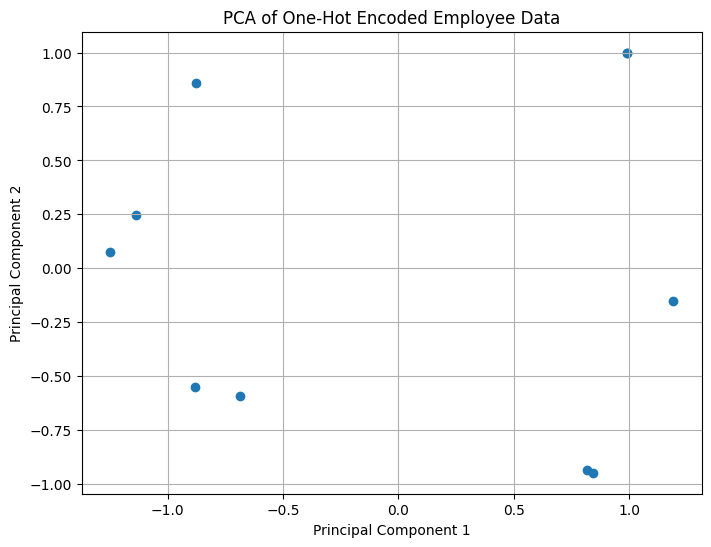

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(one_hot_df)

# Plot the 2D representation
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of One-Hot Encoded Employee Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
